In [1]:
import os, sys
import numpy as np
import tifffile
import mrcfile
import matplotlib.pyplot as plt



# 遍历所有文件，忽略子文件夹
def walk_dir(rootdir, suffix):
    file_list = []
    for parent, dirnames, filenames in os.walk(rootdir):
        # 只处理根目录，忽略所有子目录
        for filename in filenames:
            if filename.endswith(suffix):
                file_list.append(os.path.join(parent, filename))
        break  # 只遍历根目录，所以在第一次迭代后跳出循环
    return file_list

# for every tif file, read the image
def read_tif(file):
    img = tifffile.imread(file)
    return img


def read_ratio(datasetnum):
    ratio_path = f'E:\\PBC_data\\scripts\\isg-ML-sep\\ratio_rdf_mask'
    for maindir, subdir, file_name_list in os.walk(ratio_path, topdown=False):
        filelist = np.array(file_name_list)
    for name in filelist:
        if '{datasetnum}_' in name and  name.endswith('cytosol_ratiomask_1size.tiff'):
            file_name = f'{ratio_path}/{name}'
            print(file_name)
        else:
            pass

    ratio_img = tifffile.imread(file_name)
    return ratio_img



# 读取mrc
def read_mrc(datasetnum):
    mrcpath = f'E:/PBC_data/datasets/for_24_datasets' 
    for maindir, subdir, file_name_list in os.walk(mrcpath, topdown=False):
        filelist = np.array(file_name_list)
    for name in filelist:
        if datasetnum in name and  '.mrc' in name:
            mrc_name = f'{mrcpath}/{name}'
            print(mrc_name)
        else:
            pass
    mrc = mrcfile.open(mrc_name, permissive=True).data
    mrc = mrc * 27.161
    return mrc


def read_mask(datasetnum, mask_type):
    # mask_type = vesicle  , mito
    datapath = f'F:\\Salilab\\Projects\\organelle-separation\\mask_output'
    idx = datasetnum


    for file in walk_dir(datapath, '.tif'):
        if mask_type in file and idx in file:
            img = read_tif(file)

    return img 

def check_img_directions(datasetnum):

    idx = '766_2'
    isg_mask = read_mask(datasetnum, 'vesicle')
    mito_mask = read_mask(datasetnum, 'mito')
    ratio_mask = read_ratio(datasetnum)
    mrc = read_mrc(datasetnum)

    page = 242
    # 一组4张图一起显示
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    ax[0].imshow(isg_mask[page], cmap='gray')
    ax[0].set_title('isg mask')
    ax[1].imshow(mito_mask[page], cmap='gray')
    ax[1].set_title('mito mask')
    ax[2].imshow(ratio_mask[page], cmap='gray')
    ax[2].set_title('ratio mask')
    ax[3].imshow(mrc[page], cmap='gray')
    ax[3].set_title('mrc')
    plt.title(f'{datasetnum}')
    plt.show()
    plt.close()




def main():


   check_img_directions()



if __name__ == '__main__':
    main()

TypeError: check_img_directions() missing 1 required positional argument: 'datasetnum'

In [2]:
import os, sys
import numpy as np
import tifffile
import mrcfile
import matplotlib.pyplot as plt



# 遍历所有文件，忽略子文件夹
def walk_dir(rootdir, suffix):
    file_list = []
    for parent, dirnames, filenames in os.walk(rootdir):
        # 只处理根目录，忽略所有子目录
        for filename in filenames:
            if filename.endswith(suffix):
                file_list.append(os.path.join(parent, filename))
        break  # 只遍历根目录，所以在第一次迭代后跳出循环
    return file_list

# for every tif file, read the image
def read_tif(file):
    img = tifffile.imread(file)
    return img


def read_ratio(datasetnum):
    ratio_path = f'E:\\PBC_data\\scripts\\isg-ML-sep\\ratio_rdf_mask'
    for maindir, subdir, file_name_list in os.walk(ratio_path, topdown=False):
        filelist = np.array(file_name_list)
    for name in filelist:
        if '{datasetnum}_' in name and  name.endswith('cytosol_ratiomask_1size.tiff'):
            file_name = f'{ratio_path}/{name}'
            print(file_name)
        else:
            pass

    ratio_img = tifffile.imread(file_name)
    return ratio_img



# 读取mrc
def read_mrc(datasetnum):
    mrcpath = f'E:/PBC_data/datasets/for_24_datasets' 
    for maindir, subdir, file_name_list in os.walk(mrcpath, topdown=False):
        filelist = np.array(file_name_list)
    for name in filelist:
        if datasetnum in name and  '.mrc' in name:
            mrc_name = f'{mrcpath}/{name}'
            print(mrc_name)
        else:
            pass
    mrc = mrcfile.open(mrc_name, permissive=True).data
    mrc = mrc * 27.161
    return mrc


def read_mask(datasetnum, mask_type):
    # mask_type = vesicle  , mito
    datapath = f'F:\\Salilab\\Projects\\organelle-separation\\mask_output'
    idx = datasetnum


    for file in walk_dir(datapath, '.tif'):
        if mask_type in file and idx in file:
            img = read_tif(file)

    return img 

def check_img_directions(datasetnum):

    idx = '766_2'
    isg_mask = read_mask(datasetnum, 'vesicle')
    mito_mask = read_mask(datasetnum, 'mito')
    ratio_mask = read_ratio(datasetnum)
    mrc = read_mrc(datasetnum)

    page = 242
    # 一组4张图一起显示
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    ax[0].imshow(isg_mask[page], cmap='gray')
    ax[0].set_title('isg mask')
    ax[1].imshow(mito_mask[page], cmap='gray')
    ax[1].set_title('mito mask')
    ax[2].imshow(ratio_mask[page], cmap='gray')
    ax[2].set_title('ratio mask')
    ax[3].imshow(mrc[page], cmap='gray')
    ax[3].set_title('mrc')
    plt.title(f'{datasetnum}')
    plt.show()
    plt.close()




def main():

    datasetlsts = ['766_2','766_5','766_7','766_8','766_10','766_11','769_5','769_7','783_5','783_11', '783_12','784_4','784_5','784_6','784_7','785_7','822_4','822_6','822_7','842_12','842_13', '842_17','931_9','931_14']
    for datasetnum in datasetlsts:
        check_img_directions()



if __name__ == '__main__':
    main()

TypeError: check_img_directions() missing 1 required positional argument: 'datasetnum'

In [3]:
import os, sys
import numpy as np
import tifffile
import mrcfile
import matplotlib.pyplot as plt



# 遍历所有文件，忽略子文件夹
def walk_dir(rootdir, suffix):
    file_list = []
    for parent, dirnames, filenames in os.walk(rootdir):
        # 只处理根目录，忽略所有子目录
        for filename in filenames:
            if filename.endswith(suffix):
                file_list.append(os.path.join(parent, filename))
        break  # 只遍历根目录，所以在第一次迭代后跳出循环
    return file_list

# for every tif file, read the image
def read_tif(file):
    img = tifffile.imread(file)
    return img


def read_ratio(datasetnum):
    ratio_path = f'E:\\PBC_data\\scripts\\isg-ML-sep\\ratio_rdf_mask'
    for maindir, subdir, file_name_list in os.walk(ratio_path, topdown=False):
        filelist = np.array(file_name_list)
    for name in filelist:
        if '{datasetnum}_' in name and  name.endswith('cytosol_ratiomask_1size.tiff'):
            file_name = f'{ratio_path}/{name}'
            print(file_name)
        else:
            pass

    ratio_img = tifffile.imread(file_name)
    return ratio_img



# 读取mrc
def read_mrc(datasetnum):
    mrcpath = f'E:/PBC_data/datasets/for_24_datasets' 
    for maindir, subdir, file_name_list in os.walk(mrcpath, topdown=False):
        filelist = np.array(file_name_list)
    for name in filelist:
        if datasetnum in name and  '.mrc' in name:
            mrc_name = f'{mrcpath}/{name}'
            print(mrc_name)
        else:
            pass
    mrc = mrcfile.open(mrc_name, permissive=True).data
    mrc = mrc * 27.161
    return mrc


def read_mask(datasetnum, mask_type):
    # mask_type = vesicle  , mito
    datapath = f'F:\\Salilab\\Projects\\organelle-separation\\mask_output'
    idx = datasetnum


    for file in walk_dir(datapath, '.tif'):
        if mask_type in file and idx in file:
            img = read_tif(file)

    return img 

def check_img_directions(datasetnum):

    idx = '766_2'
    isg_mask = read_mask(datasetnum, 'vesicle')
    mito_mask = read_mask(datasetnum, 'mito')
    ratio_mask = read_ratio(datasetnum)
    mrc = read_mrc(datasetnum)

    page = 242
    # 一组4张图一起显示
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    ax[0].imshow(isg_mask[page], cmap='gray')
    ax[0].set_title('isg mask')
    ax[1].imshow(mito_mask[page], cmap='gray')
    ax[1].set_title('mito mask')
    ax[2].imshow(ratio_mask[page], cmap='gray')
    ax[2].set_title('ratio mask')
    ax[3].imshow(mrc[page], cmap='gray')
    ax[3].set_title('mrc')
    plt.title(f'{datasetnum}')
    plt.show()
    plt.close()




def main():

    datasetlsts = ['766_2','766_5','766_7','766_8','766_10','766_11','769_5','769_7','783_5','783_11', '783_12','784_4','784_5','784_6','784_7','785_7','822_4','822_6','822_7','842_12','842_13', '842_17','931_9','931_14']
    for datasetnum in datasetlsts:
        check_img_directions(datasetnum)



if __name__ == '__main__':
    main()

UnboundLocalError: local variable 'file_name' referenced before assignment

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/766_2_cytosol_ratiomask_1size.tiff
E:/PBC_data/datasets/for_24_datasets/Stevens_pancreatic_Ins_1E_25mM_766_2_pre_rec.mrc


d:\softwares\Anaconda3\envs\nerff\lib\site-packages\mrcfile\mrcinterpreter.py:209: RuntimeWarning: Map ID string not found - not an MRC file, or file is corrupt
  warnings.warn(msg, RuntimeWarning)
d:\softwares\Anaconda3\envs\nerff\lib\site-packages\mrcfile\mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


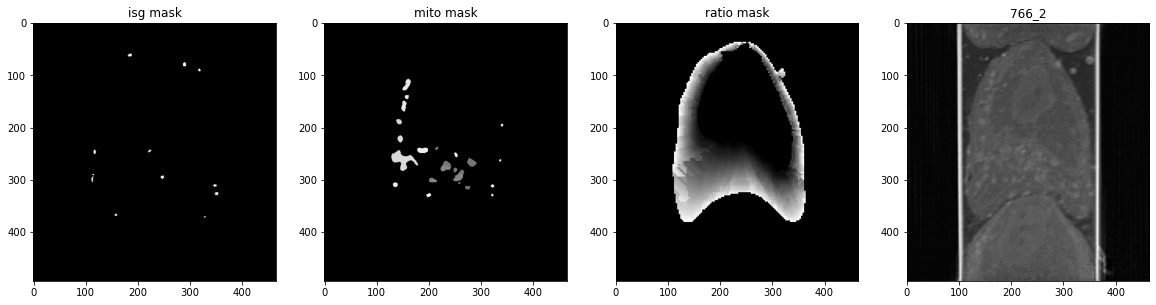

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/766_5_cytosol_ratiomask_1size.tiff
E:/PBC_data/datasets/for_24_datasets/Stevens_pancreatic_Ins_1E_25mM_766_5_pre_rec.mrc


d:\softwares\Anaconda3\envs\nerff\lib\site-packages\mrcfile\mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0xfe 0x7e 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


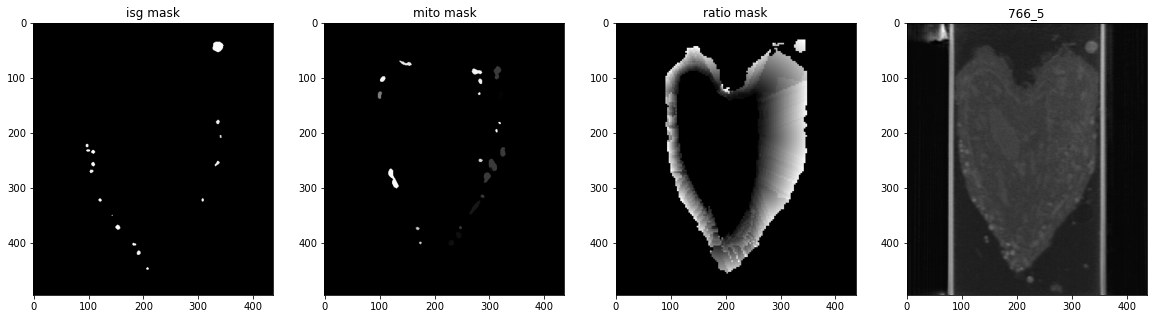

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/766_7_cytosol_ratiomask_1size.tiff
E:/PBC_data/datasets/for_24_datasets/Stevens_pancreatic_Ins_1E_25mM_766_7_pre_rec.mrc


d:\softwares\Anaconda3\envs\nerff\lib\site-packages\mrcfile\mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0x22 0x7f 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


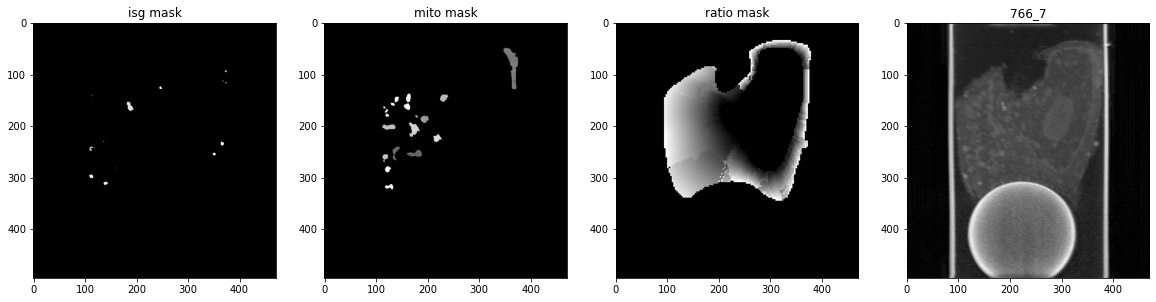

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/766_8_cytosol_ratiomask_1size.tiff
E:/PBC_data/datasets/for_24_datasets/Stevens_pancreatic_Ins_1E_25mM_766_8_pre_rec.mrc


d:\softwares\Anaconda3\envs\nerff\lib\site-packages\mrcfile\mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0x59 0x7f 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


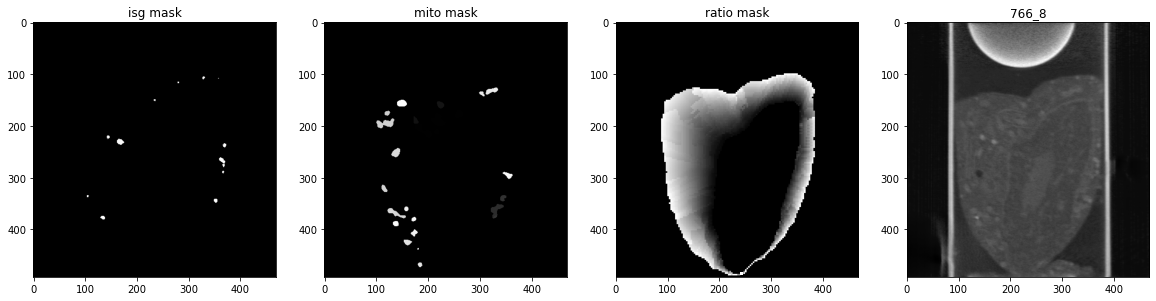

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/766_10_cytosol_ratiomask_1size.tiff
E:/PBC_data/datasets/for_24_datasets/Stevens_pancreatic_Ins_1E_25mM_766_10_pre_rec.mrc


d:\softwares\Anaconda3\envs\nerff\lib\site-packages\mrcfile\mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0x09 0x7f 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


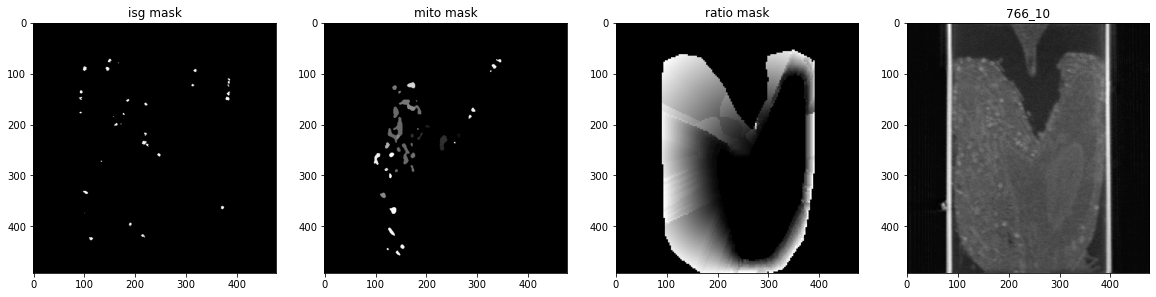

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/766_11_cytosol_ratiomask_1size.tiff
E:/PBC_data/datasets/for_24_datasets/Stevens_pancreatic_Ins_1E_25mM_766_11_pre_rec.mrc


d:\softwares\Anaconda3\envs\nerff\lib\site-packages\mrcfile\mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0xbc 0x7f 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


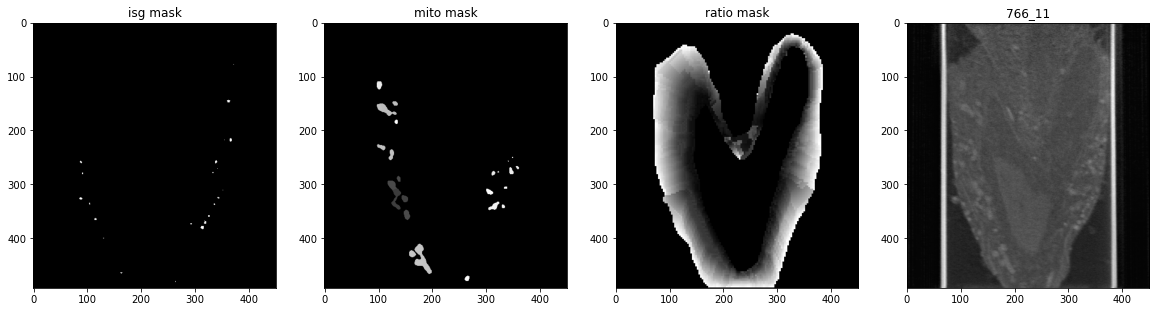

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/769_5_cytosol_ratiomask_1size.tiff
E:/PBC_data/datasets/for_24_datasets/Stevens_pancreatic_INS_1E_25mM_769_5_pre_rec.mrc


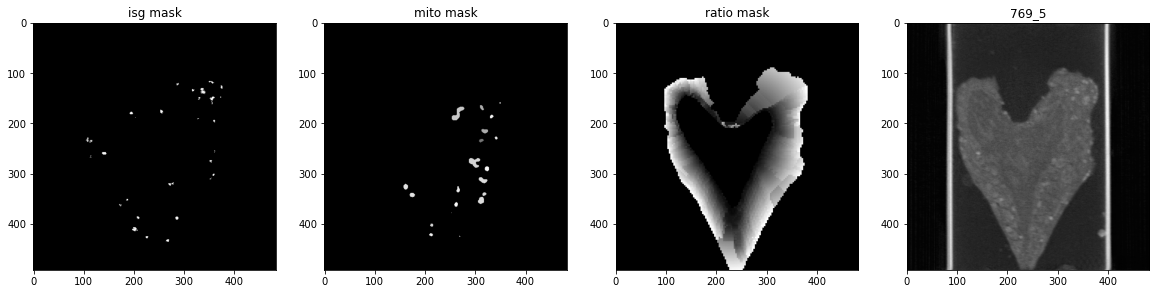

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/769_7_cytosol_ratiomask_1size.tiff
E:/PBC_data/datasets/for_24_datasets/Stevens_pancreatic_INS_1E_25mM_769_7_pre_rec.mrc


d:\softwares\Anaconda3\envs\nerff\lib\site-packages\mrcfile\mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0x1a 0x7f 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


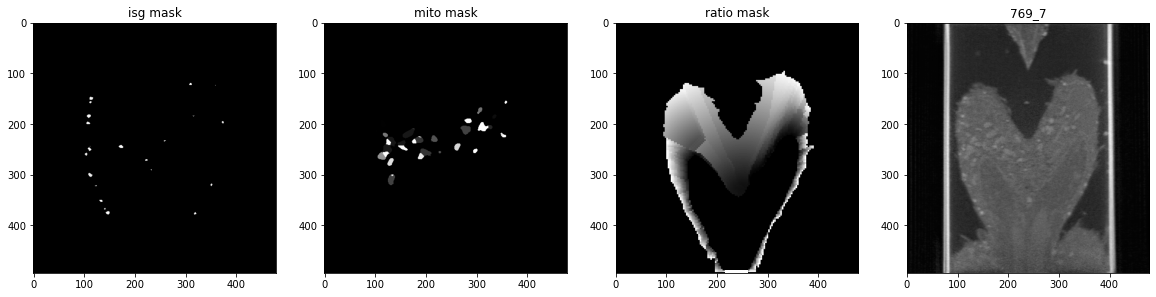

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/783_5_cytosol_ratiomask_1size.tiff
E:/PBC_data/datasets/for_24_datasets/Stevens_pancreatic_INS_1E_783_5_pre_rec.mrc


d:\softwares\Anaconda3\envs\nerff\lib\site-packages\mrcfile\mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0xeb 0x7f 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


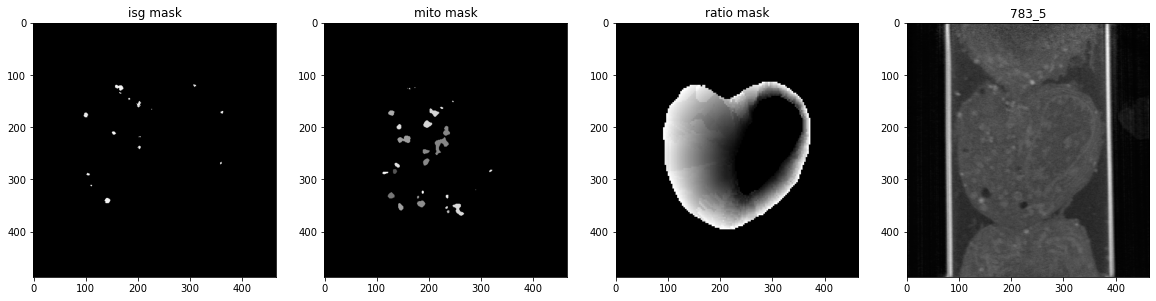

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/783_11_cytosol_ratiomask_1size.tiff
E:/PBC_data/datasets/for_24_datasets/Stevens_pancreatic_INS_1E_783_11_6_pre_rec.mrc


d:\softwares\Anaconda3\envs\nerff\lib\site-packages\mrcfile\mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0x01 0x7f 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


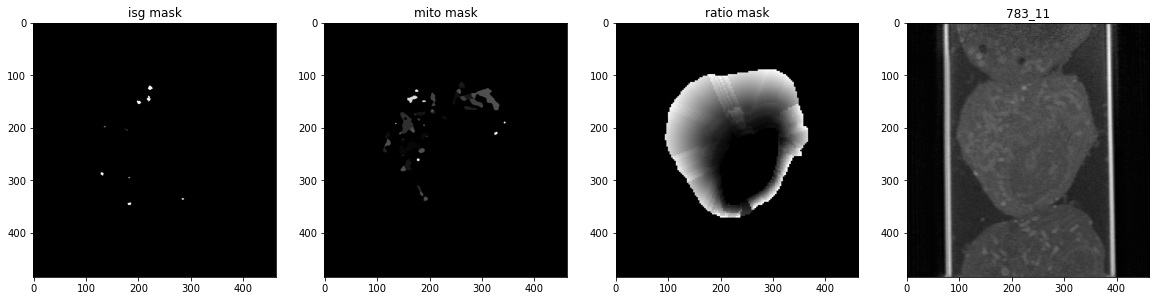

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/783_12_cytosol_ratiomask_1size.tiff
E:/PBC_data/datasets/for_24_datasets/Stevens_pancreatic_INS_1E_783_12_pre_rec.mrc


d:\softwares\Anaconda3\envs\nerff\lib\site-packages\mrcfile\mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0x6a 0x7f 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


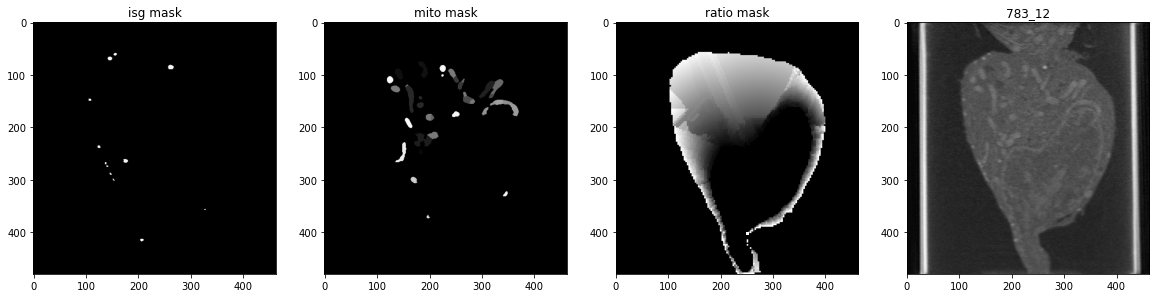

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/784_4_cytosol_ratiomask_1size.tiff
E:/PBC_data/datasets/for_24_datasets/Stevens_pancreatic_INS_1E_784_4_pre_rec.mrc


d:\softwares\Anaconda3\envs\nerff\lib\site-packages\mrcfile\mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0x50 0x7f 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


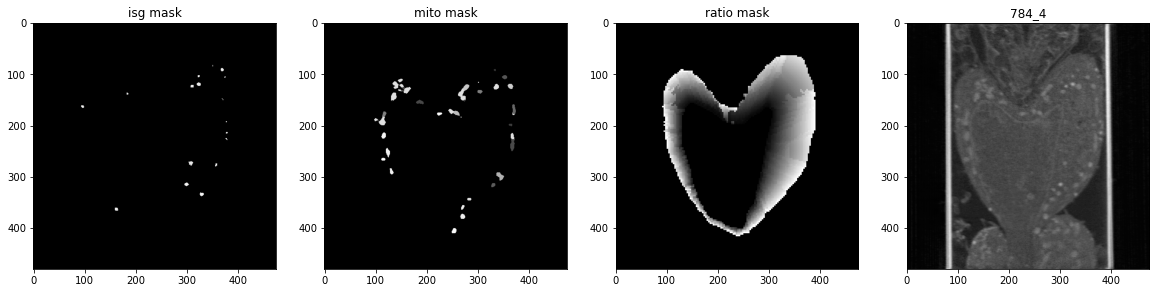

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/784_5_cytosol_ratiomask_1size.tiff
E:/PBC_data/datasets/for_24_datasets/Stevens_pancreatic_INS_1E_784_5_pre_rec.mrc


d:\softwares\Anaconda3\envs\nerff\lib\site-packages\mrcfile\mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0xb1 0x7f 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


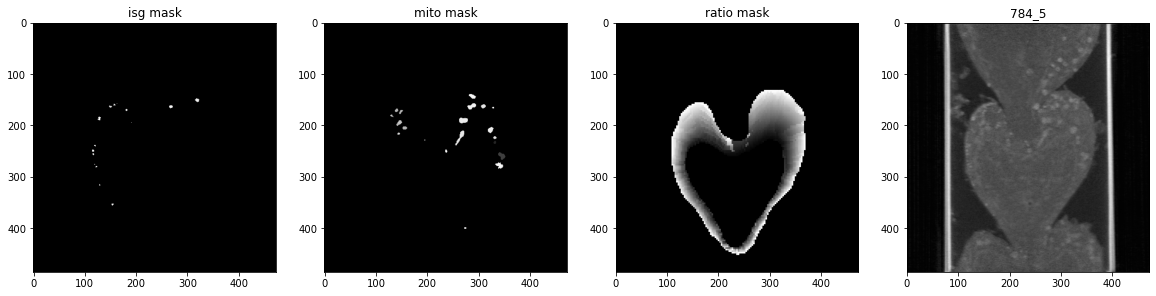

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/784_6_cytosol_ratiomask_1size.tiff
E:/PBC_data/datasets/for_24_datasets/Stevens_pancreatic_INS_1E_784_6_pre_rec.mrc


d:\softwares\Anaconda3\envs\nerff\lib\site-packages\mrcfile\mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0x46 0x7f 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


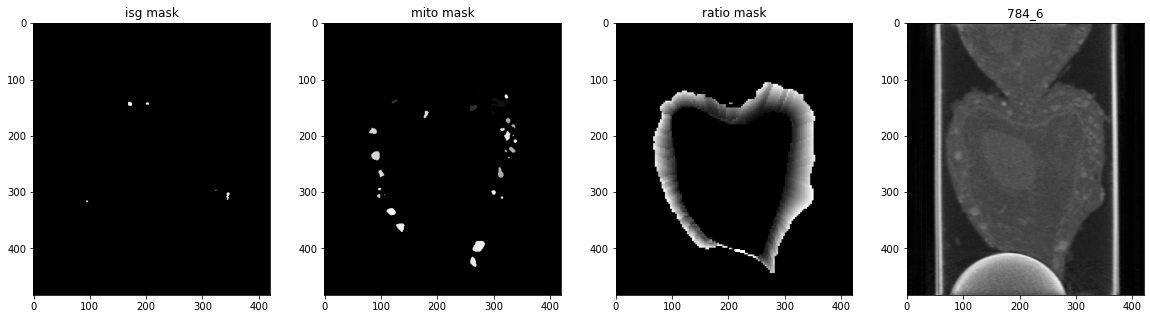

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/784_7_cytosol_ratiomask_1size.tiff
E:/PBC_data/datasets/for_24_datasets/Stevens_pancreatic_INS_1E_784_7_pre_rec.mrc


d:\softwares\Anaconda3\envs\nerff\lib\site-packages\mrcfile\mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0x7e 0x7f 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


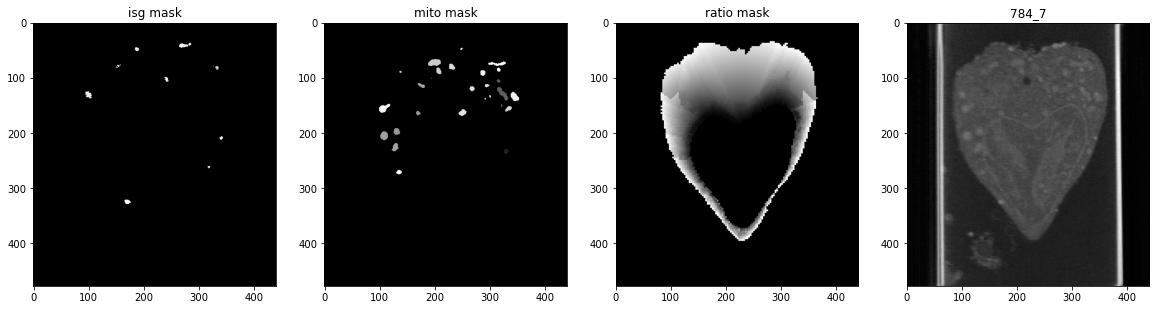

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/785_7_cytosol_ratiomask_1size.tiff
E:/PBC_data/datasets/for_24_datasets/Stevens_pancreatic_INS_1E_785_7_pre_rec.mrc


d:\softwares\Anaconda3\envs\nerff\lib\site-packages\mrcfile\mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0xb8 0x7f 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


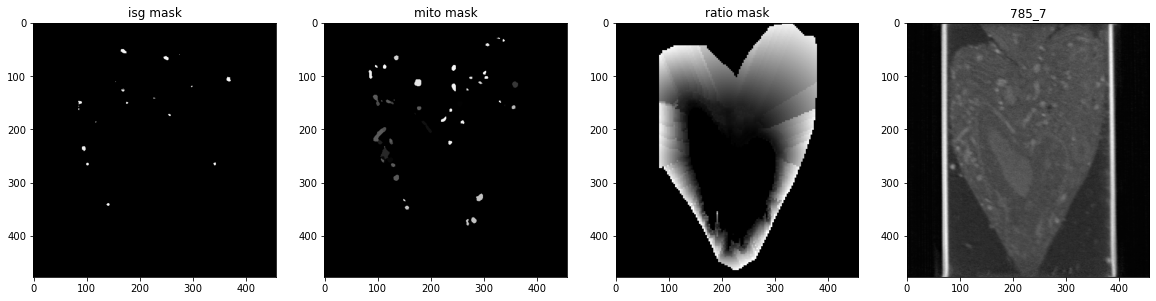

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/822_4_cytosol_ratiomask_1size.tiff
E:/PBC_data/datasets/for_24_datasets/Stevens_pancreatic_INS_1E_25-10_30min_822_4_pre_rec.mrc


d:\softwares\Anaconda3\envs\nerff\lib\site-packages\mrcfile\mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0x67 0x7f 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


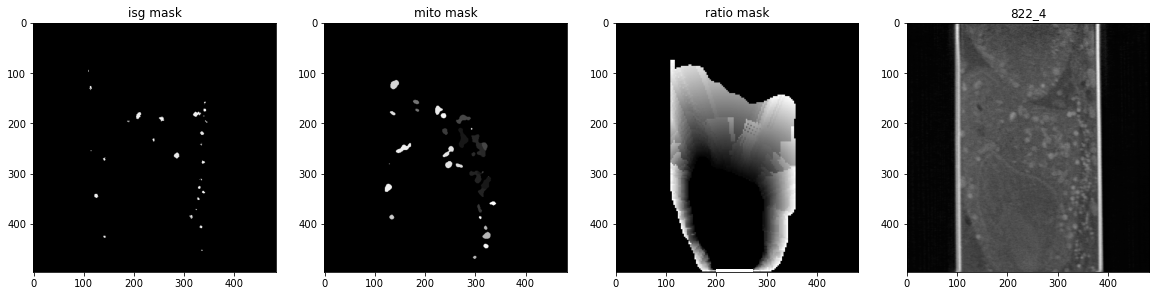

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/822_6_cytosol_ratiomask_1size.tiff
E:/PBC_data/datasets/for_24_datasets/Stevens_pancreatic_INS_1E_25-10_30min_822_6_pre_rec.mrc


d:\softwares\Anaconda3\envs\nerff\lib\site-packages\mrcfile\mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0x29 0x7f 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


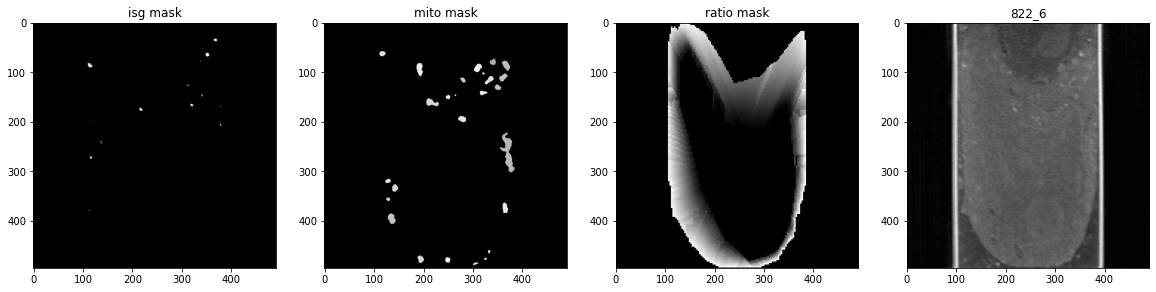

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/822_7_cytosol_ratiomask_1size.tiff
E:/PBC_data/datasets/for_24_datasets/Stevens_pancreatic_INS_1E_25-10_30min_822_7_pre_rec.mrc


d:\softwares\Anaconda3\envs\nerff\lib\site-packages\mrcfile\mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0x75 0x7f 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


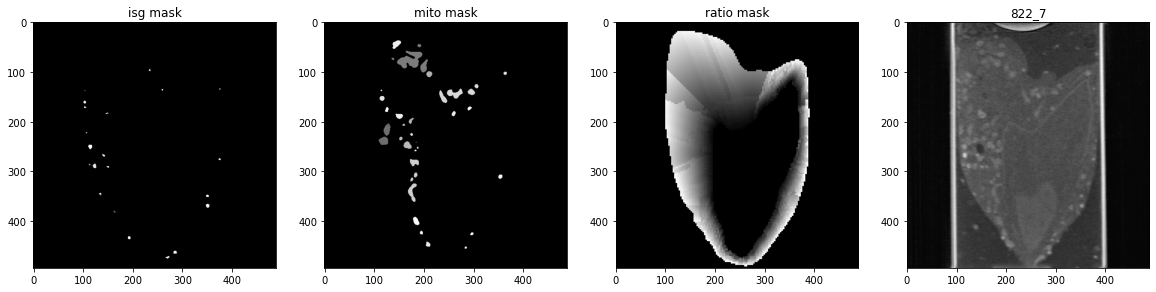

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/842_12_cytosol_ratiomask_1size.tiff
E:/PBC_data/datasets/for_24_datasets/Stevens_pancreatic_INS_1E_3_842_12_pre_rec.mrc


d:\softwares\Anaconda3\envs\nerff\lib\site-packages\mrcfile\mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0x4a 0x7f 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


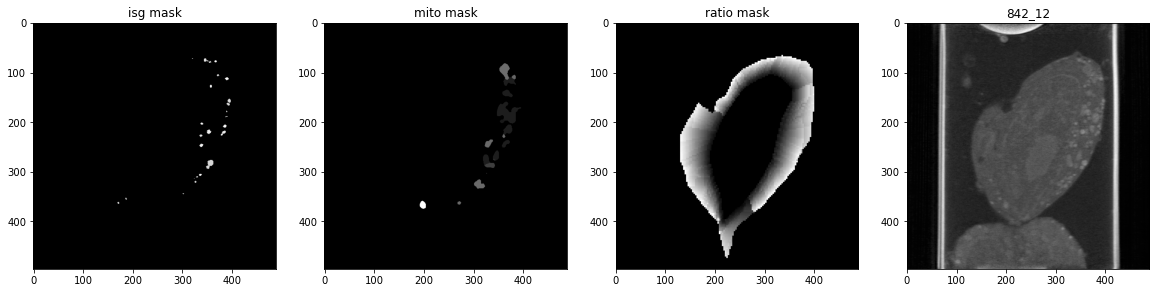

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/842_13_cytosol_ratiomask_1size.tiff
E:/PBC_data/datasets/for_24_datasets/Stevens_pancreatic_INS_1E_3_842_13_pre_rec.mrc


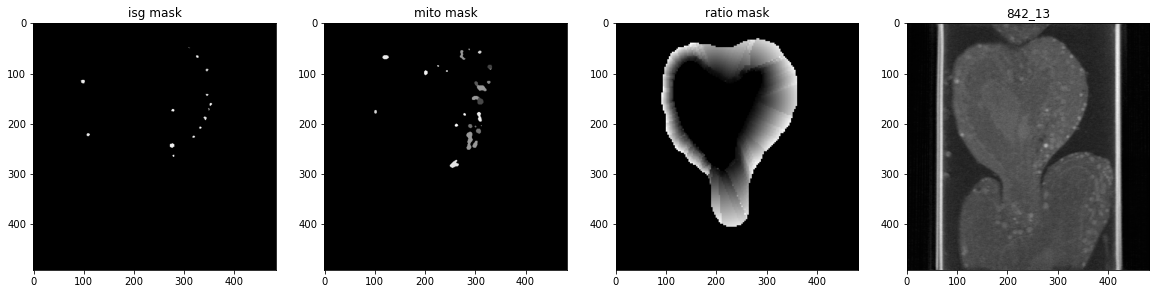

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/842_17_cytosol_ratiomask_1size.tiff
E:/PBC_data/datasets/for_24_datasets/Stevens_pancreatic_INS_1E_3_842_17_pre_rec.mrc


d:\softwares\Anaconda3\envs\nerff\lib\site-packages\mrcfile\mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0x0f 0x7f 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


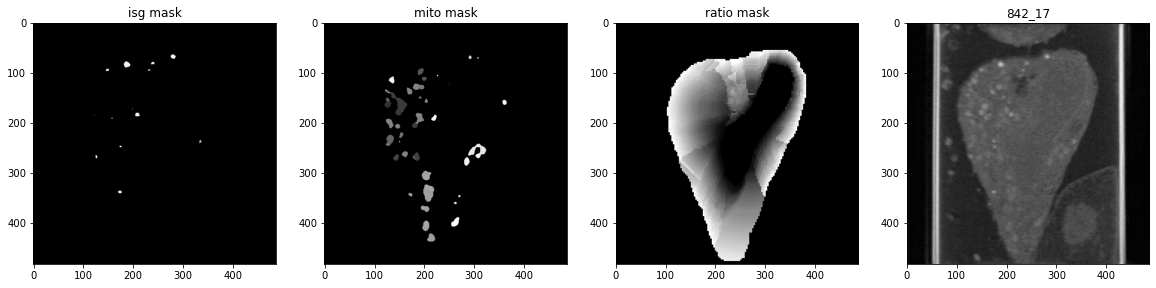

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/931_9_cytosol_ratiomask_1size.tiff
E:/PBC_data/datasets/for_24_datasets/Stevens_pancreatic_INS_1E_25-10_30min_931_9_10_pre_rec.mrc


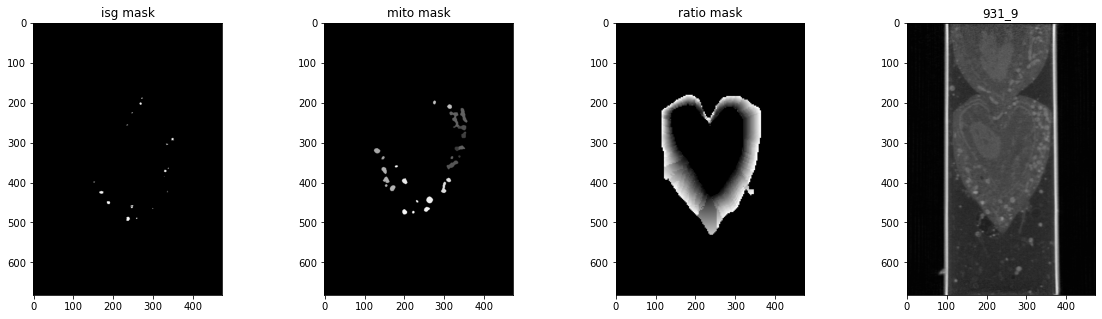

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/931_14_cytosol_ratiomask_1size.tiff
E:/PBC_data/datasets/for_24_datasets/Stevens_pancreatic_INS_1E_25-10_30min_931_14_pre_rec.mrc


d:\softwares\Anaconda3\envs\nerff\lib\site-packages\mrcfile\mrcinterpreter.py:219: RuntimeWarning: Unrecognised machine stamp: 0xc0 0x7f 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)
<ipython-input-4-07557cbf9ef7>:56: RuntimeWarning: overflow encountered in multiply
  mrc = mrc * 27.161


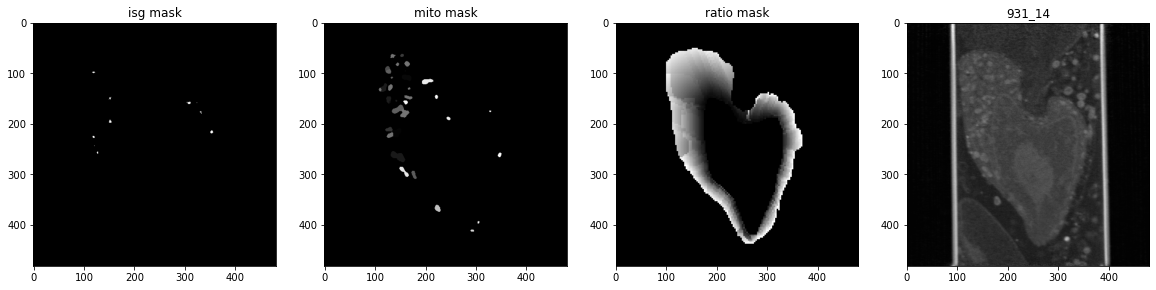

In [4]:
import os, sys
import numpy as np
import tifffile
import mrcfile
import matplotlib.pyplot as plt



# 遍历所有文件，忽略子文件夹
def walk_dir(rootdir, suffix):
    file_list = []
    for parent, dirnames, filenames in os.walk(rootdir):
        # 只处理根目录，忽略所有子目录
        for filename in filenames:
            if filename.endswith(suffix):
                file_list.append(os.path.join(parent, filename))
        break  # 只遍历根目录，所以在第一次迭代后跳出循环
    return file_list

# for every tif file, read the image
def read_tif(file):
    img = tifffile.imread(file)
    return img



def read_mask(datasetnum, mask_type):
    # mask_type = vesicle  , mito
    datapath = f'F:\\Salilab\\Projects\\organelle-separation\\mask_output'
    idx = datasetnum


    for file in walk_dir(datapath, '.tif'):
        if mask_type in file and idx in file:
            img = read_tif(file)

    return img 




# 读取mrc
def read_mrc(datasetnum):
    mrcpath = f'E:/PBC_data/datasets/for_24_datasets' 
    for maindir, subdir, file_name_list in os.walk(mrcpath, topdown=False):
        filelist = np.array(file_name_list)
    for name in filelist:
        if datasetnum in name and  '.mrc' in name:
            mrc_name = f'{mrcpath}/{name}'
            print(mrc_name)
        else:
            pass
    mrc = mrcfile.open(mrc_name, permissive=True).data
    mrc = mrc * 27.161
    return mrc

# 读取ratio mask
def read_ratio(datasetnum):
    ratio_path = f'E:\\PBC_data\\scripts\\isg-ML-sep\\ratio_rdf_mask'
    for maindir, subdir, file_name_list in os.walk(ratio_path, topdown=False):
        filelist = np.array(file_name_list)
    # print(filelist)
    for name in filelist:
        if f'{datasetnum}_' in name:
            if name.endswith('cytosol_ratiomask_1size.tiff'):
                file_name = f'{ratio_path}/{name}'
                print(file_name)
        else:
            pass

    ratio_img = tifffile.imread(file_name)
    return ratio_img


def check_img_directions(datasetnum):

    idx = '766_2'
    isg_mask = read_mask(datasetnum, 'vesicle')
    mito_mask = read_mask(datasetnum, 'mito')
    ratio_mask = read_ratio(datasetnum)
    mrc = read_mrc(datasetnum)

    page = 242
    # 一组4张图一起显示
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    ax[0].imshow(isg_mask[page], cmap='gray')
    ax[0].set_title('isg mask')
    ax[1].imshow(mito_mask[page], cmap='gray')
    ax[1].set_title('mito mask')
    ax[2].imshow(ratio_mask[page], cmap='gray')
    ax[2].set_title('ratio mask')
    ax[3].imshow(mrc[page], cmap='gray')
    ax[3].set_title('mrc')
    plt.title(f'{datasetnum}')
    plt.show()
    plt.close()




def main():

    datasetlsts = ['766_2','766_5','766_7','766_8','766_10','766_11','769_5','769_7','783_5','783_11', '783_12','784_4','784_5','784_6','784_7','785_7','822_4','822_6','822_7','842_12','842_13', '842_17','931_9','931_14']
    for datasetnum in datasetlsts:
        check_img_directions(datasetnum)



if __name__ == '__main__':
    main()

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/766_2_cytosol_ratiomask_1size.tiff


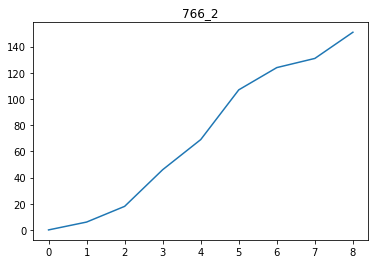

In [5]:
import os, sys
import numpy as np
import tifffile
import mrcfile
import matplotlib.pyplot as plt



# 遍历所有文件，忽略子文件夹
def walk_dir(rootdir, suffix):
    file_list = []
    for parent, dirnames, filenames in os.walk(rootdir):
        # 只处理根目录，忽略所有子目录
        for filename in filenames:
            if filename.endswith(suffix):
                file_list.append(os.path.join(parent, filename))
        break  # 只遍历根目录，所以在第一次迭代后跳出循环
    return file_list

# for every tif file, read the image
def read_tif(file):
    img = tifffile.imread(file)
    return img



def read_mask(datasetnum, mask_type):
    # mask_type = vesicle  , mito
    datapath = f'F:\\Salilab\\Projects\\organelle-separation\\mask_output'
    idx = datasetnum


    for file in walk_dir(datapath, '.tif'):
        if mask_type in file and idx in file:
            img = read_tif(file)

    return img 




# 读取mrc
def read_mrc(datasetnum):
    mrcpath = f'E:/PBC_data/datasets/for_24_datasets' 
    for maindir, subdir, file_name_list in os.walk(mrcpath, topdown=False):
        filelist = np.array(file_name_list)
    for name in filelist:
        if datasetnum in name and  '.mrc' in name:
            mrc_name = f'{mrcpath}/{name}'
            print(mrc_name)
        else:
            pass
    mrc = mrcfile.open(mrc_name, permissive=True).data
    mrc = mrc * 27.161
    return mrc

# 读取ratio mask
def read_ratio(datasetnum):
    ratio_path = f'E:\\PBC_data\\scripts\\isg-ML-sep\\ratio_rdf_mask'
    for maindir, subdir, file_name_list in os.walk(ratio_path, topdown=False):
        filelist = np.array(file_name_list)
    # print(filelist)
    for name in filelist:
        if f'{datasetnum}_' in name:
            if name.endswith('cytosol_ratiomask_1size.tiff'):
                file_name = f'{ratio_path}/{name}'
                print(file_name)
        else:
            pass

    ratio_img = tifffile.imread(file_name)
    return ratio_img


def check_img_directions(datasetnum):

    idx = '766_2'
    isg_mask = read_mask(datasetnum, 'vesicle')
    mito_mask = read_mask(datasetnum, 'mito')
    ratio_mask = read_ratio(datasetnum)
    mrc = read_mrc(datasetnum)

    page = 242
    # 一组4张图一起显示
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    ax[0].imshow(isg_mask[page], cmap='gray')
    ax[0].set_title('isg mask')
    ax[1].imshow(mito_mask[page], cmap='gray')
    ax[1].set_title('mito mask')
    ax[2].imshow(ratio_mask[page], cmap='gray')
    ax[2].set_title('ratio mask')
    ax[3].imshow(mrc[page], cmap='gray')
    ax[3].set_title('mrc')
    plt.title(f'{datasetnum}')
    plt.show()
    plt.close()





def get_vesicle_rdf(datasetnum):
    rdflst = []
    isg_mask = read_mask(datasetnum, 'vesicle')
    # mito_mask = read_mask(datasetnum, 'mito')

    ratio_mask = read_ratio(datasetnum)
    mask = isg_mask

    #对于0以外的所有label值，每一个label值所在的点计算它在ratio_mask上对应的值,对单个label值求平均，把结果存到rdflst里
    for label in np.unique(mask):
        if label != 0:
            rdf = np.mean(ratio_mask[mask == label])
            rdflst.append(rdf)

    return rdflst


def draw_rdf(rdflst):
    # 将0-1分成8等分，把rdflst中的值分别放到对应的区间里，统计每个区间的个数，画成连线图

    # 0-1分成8等分
    bins = np.linspace(0, 1, 9)
    # 把rdflst中的值分别放到对应的区间里
    rdf_bins = np.digitize(rdflst, bins)
    # 统计每个区间的个数
    rdf_bins_count = np.bincount(rdf_bins)
    # 画成连线图
    plt.plot(rdf_bins_count)
    



def main():

    datasetlsts = ['766_2','766_5','766_7','766_8','766_10','766_11','769_5','769_7','783_5','783_11', '783_12','784_4','784_5','784_6','784_7','785_7','822_4','822_6','822_7','842_12','842_13', '842_17','931_9','931_14']
    datasetlsts = ['766_2',]
    for datasetnum in datasetlsts:
        # check_img_directions(datasetnum) # ok
        
        vesicle_rdf_lst = get_vesicle_rdf(datasetnum)

        #把结果以csv文件的形式存到指定文件夹
        outputpath = f'F:\\Salilab\\Projects\\IPA-toolbox\\raw_image\\rdf_results'
        outputfile = f'{outputpath}/{datasetnum}_vesicle_rdf.csv'
        np.savetxt(outputfile, vesicle_rdf_lst, delimiter=',')        

        #画图
        draw_rdf(vesicle_rdf_lst)
        plt.title(f'{datasetnum}')
        plt.show()
        plt.close()

if __name__ == '__main__':
    main()

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/766_2_cytosol_ratiomask_1size.tiff


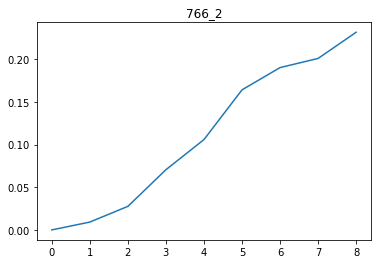

In [6]:
# coding = utf-8

'''
read ratio mask
and save rdf in the map 
'''
#%%

import os, sys
import numpy as np
import tifffile
import mrcfile
import matplotlib.pyplot as plt



# 遍历所有文件，忽略子文件夹
def walk_dir(rootdir, suffix):
    file_list = []
    for parent, dirnames, filenames in os.walk(rootdir):
        # 只处理根目录，忽略所有子目录
        for filename in filenames:
            if filename.endswith(suffix):
                file_list.append(os.path.join(parent, filename))
        break  # 只遍历根目录，所以在第一次迭代后跳出循环
    return file_list

# for every tif file, read the image
def read_tif(file):
    img = tifffile.imread(file)
    return img



def read_mask(datasetnum, mask_type):
    # mask_type = vesicle  , mito
    datapath = f'F:\\Salilab\\Projects\\organelle-separation\\mask_output'
    idx = datasetnum


    for file in walk_dir(datapath, '.tif'):
        if mask_type in file and idx in file:
            img = read_tif(file)

    return img 




# 读取mrc
def read_mrc(datasetnum):
    mrcpath = f'E:/PBC_data/datasets/for_24_datasets' 
    for maindir, subdir, file_name_list in os.walk(mrcpath, topdown=False):
        filelist = np.array(file_name_list)
    for name in filelist:
        if datasetnum in name and  '.mrc' in name:
            mrc_name = f'{mrcpath}/{name}'
            print(mrc_name)
        else:
            pass
    mrc = mrcfile.open(mrc_name, permissive=True).data
    mrc = mrc * 27.161
    return mrc

# 读取ratio mask
def read_ratio(datasetnum):
    ratio_path = f'E:\\PBC_data\\scripts\\isg-ML-sep\\ratio_rdf_mask'
    for maindir, subdir, file_name_list in os.walk(ratio_path, topdown=False):
        filelist = np.array(file_name_list)
    # print(filelist)
    for name in filelist:
        if f'{datasetnum}_' in name:
            if name.endswith('cytosol_ratiomask_1size.tiff'):
                file_name = f'{ratio_path}/{name}'
                print(file_name)
        else:
            pass

    ratio_img = tifffile.imread(file_name)
    return ratio_img


def check_img_directions(datasetnum):

    idx = '766_2'
    isg_mask = read_mask(datasetnum, 'vesicle')
    mito_mask = read_mask(datasetnum, 'mito')
    ratio_mask = read_ratio(datasetnum)
    mrc = read_mrc(datasetnum)

    page = 242
    # 一组4张图一起显示
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    ax[0].imshow(isg_mask[page], cmap='gray')
    ax[0].set_title('isg mask')
    ax[1].imshow(mito_mask[page], cmap='gray')
    ax[1].set_title('mito mask')
    ax[2].imshow(ratio_mask[page], cmap='gray')
    ax[2].set_title('ratio mask')
    ax[3].imshow(mrc[page], cmap='gray')
    ax[3].set_title('mrc')
    plt.title(f'{datasetnum}')
    plt.show()
    plt.close()





def get_vesicle_rdf(datasetnum):
    rdflst = []
    isg_mask = read_mask(datasetnum, 'vesicle')
    # mito_mask = read_mask(datasetnum, 'mito')

    ratio_mask = read_ratio(datasetnum)
    mask = isg_mask

    #对于0以外的所有label值，每一个label值所在的点计算它在ratio_mask上对应的值,对单个label值求平均，把结果存到rdflst里
    for label in np.unique(mask):
        if label != 0:
            rdf = np.mean(ratio_mask[mask == label])
            rdflst.append(rdf)

    return rdflst


def draw_rdf(rdflst):
    # 将0-1分成8等分，把rdflst中的值分别放到对应的区间里，统计每个区间的个数，画成连线图

    # 0-1分成8等分
    bins = np.linspace(0, 1, 9)
    # 把rdflst中的值分别放到对应的区间里
    rdf_bins = np.digitize(rdflst, bins)
    # 统计每个区间的个数
    rdf_bins_count = np.bincount(rdf_bins)
    #数值换成个百分比率
    rdf_bins_count = rdf_bins_count / np.sum(rdf_bins_count)

    # 画成连线图
    plt.plot(rdf_bins_count)
    



def main():

    datasetlsts = ['766_2','766_5','766_7','766_8','766_10','766_11','769_5','769_7','783_5','783_11', '783_12','784_4','784_5','784_6','784_7','785_7','822_4','822_6','822_7','842_12','842_13', '842_17','931_9','931_14']
    datasetlsts = ['766_2',]
    for datasetnum in datasetlsts:
        # check_img_directions(datasetnum) # ok

        vesicle_rdf_lst = get_vesicle_rdf(datasetnum)

        #把结果以csv文件的形式存到指定文件夹
        outputpath = f'F:\\Salilab\\Projects\\IPA-toolbox\\raw_image\\rdf_results'
        outputfile = f'{outputpath}/{datasetnum}_vesicle_rdf.csv'
        np.savetxt(outputfile, vesicle_rdf_lst, delimiter=',')        

        #画图
        draw_rdf(vesicle_rdf_lst)
        plt.title(f'{datasetnum}')
        plt.show()
        plt.close()

if __name__ == '__main__':
    main()

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/766_2_cytosol_ratiomask_1size.tiff


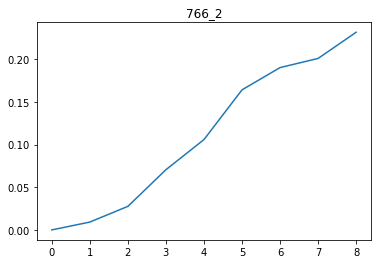

[0.0, 0.05450059933368997, 0.06941516688686894, 0.08882373494466311, 0.10358097873604527, 0.11307282195873762, 0.1316517157683275, 0.14357481674399986, 0.14973414892768988, 0.1523969329298037, 0.15908468545424162, 0.17062943414623855, 0.17116686382684818, 0.1716522368064922, 0.18778401159214148, 0.1926580853396896, 0.1976416565321932, 0.19768339975356847, 0.1991839228825377, 0.21918474726285253, 0.23355337163427659, 0.24000458875196565, 0.2447442802584655, 0.24769708344787342, 0.2511720978339693, 0.2557712788765508, 0.2590477779555436, 0.2643064720771331, 0.27893588216317167, 0.28094229198995907, 0.28463198169499715, 0.2856036612599223, 0.2869568166723845, 0.2882003413026722, 0.28902414234603574, 0.2899495170143616, 0.2972921041060405, 0.298167850041797, 0.29981711911837305, 0.30052882944646153, 0.30059523819277506, 0.3024741775813645, 0.30490520335203714, 0.3067307906934202, 0.3070753489100502, 0.30789792878641775, 0.31370329734214014, 0.31649240337845075, 0.3167376134548882, 0.320639

In [7]:
import os, sys
import numpy as np
import tifffile
import mrcfile
import matplotlib.pyplot as plt



# 遍历所有文件，忽略子文件夹
def walk_dir(rootdir, suffix):
    file_list = []
    for parent, dirnames, filenames in os.walk(rootdir):
        # 只处理根目录，忽略所有子目录
        for filename in filenames:
            if filename.endswith(suffix):
                file_list.append(os.path.join(parent, filename))
        break  # 只遍历根目录，所以在第一次迭代后跳出循环
    return file_list

# for every tif file, read the image
def read_tif(file):
    img = tifffile.imread(file)
    return img



def read_mask(datasetnum, mask_type):
    # mask_type = vesicle  , mito
    datapath = f'F:\\Salilab\\Projects\\organelle-separation\\mask_output'
    idx = datasetnum


    for file in walk_dir(datapath, '.tif'):
        if mask_type in file and idx in file:
            img = read_tif(file)

    return img 




# 读取mrc
def read_mrc(datasetnum):
    mrcpath = f'E:/PBC_data/datasets/for_24_datasets' 
    for maindir, subdir, file_name_list in os.walk(mrcpath, topdown=False):
        filelist = np.array(file_name_list)
    for name in filelist:
        if datasetnum in name and  '.mrc' in name:
            mrc_name = f'{mrcpath}/{name}'
            print(mrc_name)
        else:
            pass
    mrc = mrcfile.open(mrc_name, permissive=True).data
    mrc = mrc * 27.161
    return mrc

# 读取ratio mask
def read_ratio(datasetnum):
    ratio_path = f'E:\\PBC_data\\scripts\\isg-ML-sep\\ratio_rdf_mask'
    for maindir, subdir, file_name_list in os.walk(ratio_path, topdown=False):
        filelist = np.array(file_name_list)
    # print(filelist)
    for name in filelist:
        if f'{datasetnum}_' in name:
            if name.endswith('cytosol_ratiomask_1size.tiff'):
                file_name = f'{ratio_path}/{name}'
                print(file_name)
        else:
            pass

    ratio_img = tifffile.imread(file_name)
    return ratio_img


def check_img_directions(datasetnum):

    idx = '766_2'
    isg_mask = read_mask(datasetnum, 'vesicle')
    mito_mask = read_mask(datasetnum, 'mito')
    ratio_mask = read_ratio(datasetnum)
    mrc = read_mrc(datasetnum)

    page = 242
    # 一组4张图一起显示
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    ax[0].imshow(isg_mask[page], cmap='gray')
    ax[0].set_title('isg mask')
    ax[1].imshow(mito_mask[page], cmap='gray')
    ax[1].set_title('mito mask')
    ax[2].imshow(ratio_mask[page], cmap='gray')
    ax[2].set_title('ratio mask')
    ax[3].imshow(mrc[page], cmap='gray')
    ax[3].set_title('mrc')
    plt.title(f'{datasetnum}')
    plt.show()
    plt.close()





def get_vesicle_rdf(datasetnum):
    rdflst = []
    isg_mask = read_mask(datasetnum, 'vesicle')
    # mito_mask = read_mask(datasetnum, 'mito')

    ratio_mask = read_ratio(datasetnum)
    mask = isg_mask

    #对于0以外的所有label值，每一个label值所在的点计算它在ratio_mask上对应的值,对单个label值求平均，把结果存到rdflst里
    for label in np.unique(mask):
        if label != 0:
            rdf = np.mean(ratio_mask[mask == label])
            rdflst.append(rdf)

    return rdflst


def draw_rdf(rdflst):
    # 将0-1分成8等分，把rdflst中的值分别放到对应的区间里，统计每个区间的个数，画成连线图

    # 0-1分成8等分
    bins = np.linspace(0, 1, 9)
    # 把rdflst中的值分别放到对应的区间里
    rdf_bins = np.digitize(rdflst, bins)
    # 统计每个区间的个数
    rdf_bins_count = np.bincount(rdf_bins)
    #数值换成个百分比率
    rdf_bins_count = rdf_bins_count / np.sum(rdf_bins_count)

    # 画成连线图
    plt.plot(rdf_bins_count)
    



def main():

    datasetlsts = ['766_2','766_5','766_7','766_8','766_10','766_11','769_5','769_7','783_5','783_11', '783_12','784_4','784_5','784_6','784_7','785_7','822_4','822_6','822_7','842_12','842_13', '842_17','931_9','931_14']
    datasetlsts = ['766_2',]
    for datasetnum in datasetlsts:
        # check_img_directions(datasetnum) # ok

        vesicle_rdf_lst = get_vesicle_rdf(datasetnum)

        #把结果以csv文件的形式存到指定文件夹
        outputpath = f'F:\\Salilab\\Projects\\IPA-toolbox\\raw_image\\rdf_results'
        outputfile = f'{outputpath}/{datasetnum}_vesicle_rdf.csv'
        np.savetxt(outputfile, vesicle_rdf_lst, delimiter=',')        


        #画图
        draw_rdf(vesicle_rdf_lst)
        plt.title(f'{datasetnum}')
        plt.show()
        plt.close()

        print(sorted(vesicle_rdf_lst))

if __name__ == '__main__':
    main()

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/766_2_cytosol_ratiomask_1size.tiff


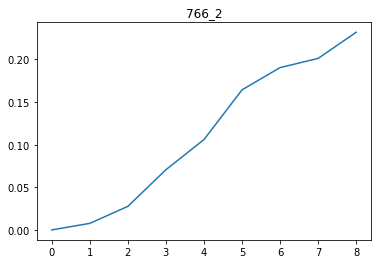

[0.05450059933368997, 0.06941516688686894, 0.08882373494466311, 0.10358097873604527, 0.11307282195873762, 0.1316517157683275, 0.14357481674399986, 0.14973414892768988, 0.1523969329298037, 0.15908468545424162, 0.17062943414623855, 0.17116686382684818, 0.1716522368064922, 0.18778401159214148, 0.1926580853396896, 0.1976416565321932, 0.19768339975356847, 0.1991839228825377, 0.21918474726285253, 0.23355337163427659, 0.24000458875196565, 0.2447442802584655, 0.24769708344787342, 0.2511720978339693, 0.2557712788765508, 0.2590477779555436, 0.2643064720771331, 0.27893588216317167, 0.28094229198995907, 0.28463198169499715, 0.2856036612599223, 0.2869568166723845, 0.2882003413026722, 0.28902414234603574, 0.2899495170143616, 0.2972921041060405, 0.298167850041797, 0.29981711911837305, 0.30052882944646153, 0.30059523819277506, 0.3024741775813645, 0.30490520335203714, 0.3067307906934202, 0.3070753489100502, 0.30789792878641775, 0.31370329734214014, 0.31649240337845075, 0.3167376134548882, 0.32063987976

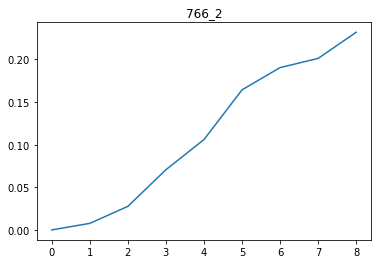

[0.05450059933368997, 0.06941516688686894, 0.08882373494466311, 0.10358097873604527, 0.11307282195873762, 0.1316517157683275, 0.14357481674399986, 0.14973414892768988, 0.1523969329298037, 0.15908468545424162, 0.17062943414623855, 0.17116686382684818, 0.1716522368064922, 0.18778401159214148, 0.1926580853396896, 0.1976416565321932, 0.19768339975356847, 0.1991839228825377, 0.21918474726285253, 0.23355337163427659, 0.24000458875196565, 0.2447442802584655, 0.24769708344787342, 0.2511720978339693, 0.2557712788765508, 0.2590477779555436, 0.2643064720771331, 0.27893588216317167, 0.28094229198995907, 0.28463198169499715, 0.2856036612599223, 0.2869568166723845, 0.2882003413026722, 0.28902414234603574, 0.2899495170143616, 0.2972921041060405, 0.298167850041797, 0.29981711911837305, 0.30052882944646153, 0.30059523819277506, 0.3024741775813645, 0.30490520335203714, 0.3067307906934202, 0.3070753489100502, 0.30789792878641775, 0.31370329734214014, 0.31649240337845075, 0.3167376134548882, 0.32063987976

In [8]:
import os, sys
import numpy as np
import tifffile
import mrcfile
import matplotlib.pyplot as plt



# 遍历所有文件，忽略子文件夹
def walk_dir(rootdir, suffix):
    file_list = []
    for parent, dirnames, filenames in os.walk(rootdir):
        # 只处理根目录，忽略所有子目录
        for filename in filenames:
            if filename.endswith(suffix):
                file_list.append(os.path.join(parent, filename))
        break  # 只遍历根目录，所以在第一次迭代后跳出循环
    return file_list

# for every tif file, read the image
def read_tif(file):
    img = tifffile.imread(file)
    return img



def read_mask(datasetnum, mask_type):
    # mask_type = vesicle  , mito
    datapath = f'F:\\Salilab\\Projects\\organelle-separation\\mask_output'
    idx = datasetnum


    for file in walk_dir(datapath, '.tif'):
        if mask_type in file and idx in file:
            img = read_tif(file)

    return img 




# 读取mrc
def read_mrc(datasetnum):
    mrcpath = f'E:/PBC_data/datasets/for_24_datasets' 
    for maindir, subdir, file_name_list in os.walk(mrcpath, topdown=False):
        filelist = np.array(file_name_list)
    for name in filelist:
        if datasetnum in name and  '.mrc' in name:
            mrc_name = f'{mrcpath}/{name}'
            print(mrc_name)
        else:
            pass
    mrc = mrcfile.open(mrc_name, permissive=True).data
    mrc = mrc * 27.161
    return mrc

# 读取ratio mask
def read_ratio(datasetnum):
    ratio_path = f'E:\\PBC_data\\scripts\\isg-ML-sep\\ratio_rdf_mask'
    for maindir, subdir, file_name_list in os.walk(ratio_path, topdown=False):
        filelist = np.array(file_name_list)
    # print(filelist)
    for name in filelist:
        if f'{datasetnum}_' in name:
            if name.endswith('cytosol_ratiomask_1size.tiff'):
                file_name = f'{ratio_path}/{name}'
                print(file_name)
        else:
            pass

    ratio_img = tifffile.imread(file_name)
    return ratio_img


def check_img_directions(datasetnum):

    idx = '766_2'
    isg_mask = read_mask(datasetnum, 'vesicle')
    mito_mask = read_mask(datasetnum, 'mito')
    ratio_mask = read_ratio(datasetnum)
    mrc = read_mrc(datasetnum)

    page = 242
    # 一组4张图一起显示
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    ax[0].imshow(isg_mask[page], cmap='gray')
    ax[0].set_title('isg mask')
    ax[1].imshow(mito_mask[page], cmap='gray')
    ax[1].set_title('mito mask')
    ax[2].imshow(ratio_mask[page], cmap='gray')
    ax[2].set_title('ratio mask')
    ax[3].imshow(mrc[page], cmap='gray')
    ax[3].set_title('mrc')
    plt.title(f'{datasetnum}')
    plt.show()
    plt.close()





def get_vesicle_rdf(datasetnum):
    rdflst = []
    isg_mask = read_mask(datasetnum, 'vesicle')
    # mito_mask = read_mask(datasetnum, 'mito')

    ratio_mask = read_ratio(datasetnum)
    mask = isg_mask

    #对于0以外的所有label值，每一个label值所在的点计算它在ratio_mask上对应的值,对单个label值求平均，把结果存到rdflst里
    for label in np.unique(mask):
        if label != 0:
            rdf = np.mean(ratio_mask[mask == label])
            rdflst.append(rdf)

    # 去除0值
    rdflst = [x for x in rdflst if x != 0]
    return rdflst

def get_mito_rdf(datasetnum):
    rdflst = []
    mito_mask = read_mask(datasetnum, 'mito')
    # isg_mask = read_mask(datasetnum, 'vesicle')

    ratio_mask = read_ratio(datasetnum)
    mask = mito_mask

    #对于0以外的所有label值，每一个label值所在的点计算它在ratio_mask上对应的值,对单个label值求平均，把结果存到rdflst里
    for label in np.unique(mask):
        if label != 0:
            rdf = np.mean(ratio_mask[mask == label])
            rdflst.append(rdf)

    # 去除0值
    rdflst = [x for x in rdflst if x != 0]
    return rdflst



def draw_rdf(rdflst):
    # 将0-1分成8等分，把rdflst中的值分别放到对应的区间里，统计每个区间的个数，画成连线图

    # 0-1分成8等分
    bins = np.linspace(0, 1, 9)
    # 把rdflst中的值分别放到对应的区间里
    rdf_bins = np.digitize(rdflst, bins)
    # 统计每个区间的个数
    rdf_bins_count = np.bincount(rdf_bins)
    #数值换成个百分比率
    rdf_bins_count = rdf_bins_count / np.sum(rdf_bins_count)

    # 画成连线图
    plt.plot(rdf_bins_count)
    



def main():

    datasetlsts = ['766_2','766_5','766_7','766_8','766_10','766_11','769_5','769_7','783_5','783_11', '783_12','784_4','784_5','784_6','784_7','785_7','822_4','822_6','822_7','842_12','842_13', '842_17','931_9','931_14']
    datasetlsts = ['766_2',]
    for datasetnum in datasetlsts:
        # check_img_directions(datasetnum) # ok

        vesicle_rdf_lst = get_vesicle_rdf(datasetnum)

        #把结果以csv文件的形式存到指定文件夹
        outputpath = f'F:\\Salilab\\Projects\\IPA-toolbox\\raw_image\\rdf_results'
        outputfile = f'{outputpath}/{datasetnum}_vesicle_rdf.csv'
        np.savetxt(outputfile, vesicle_rdf_lst, delimiter=',')        



        #画图
        draw_rdf(vesicle_rdf_lst)
        plt.title(f'{datasetnum}')
        plt.show()
        plt.close()

        print(sorted(vesicle_rdf_lst))

        # 读取csv文件
        rdf = np.loadtxt(outputfile, delimiter=',')

        #画图
        draw_rdf(rdf)
        plt.title(f'{datasetnum}')
        plt.show()
        plt.close()

        print(sorted(rdf))


        # mito_rdf_lst = get_mito_rdf(datasetnum)

        # #把结果以csv文件的形式存到指定文件夹
        # outputpath = f'F:\\Salilab\\Projects\\IPA-toolbox\\raw_image\\rdf_results'
        # outputfile = f'{outputpath}/{datasetnum}_mito_rdf.csv'
        # np.savetxt(outputfile, mito_rdf_lst, delimiter=',')







if __name__ == '__main__':
    main()

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/766_2_cytosol_ratiomask_1size.tiff


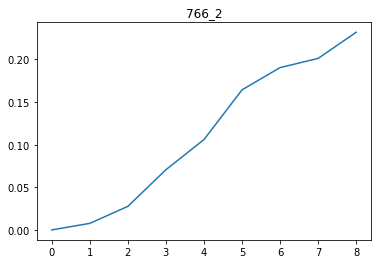

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/766_2_cytosol_ratiomask_1size.tiff


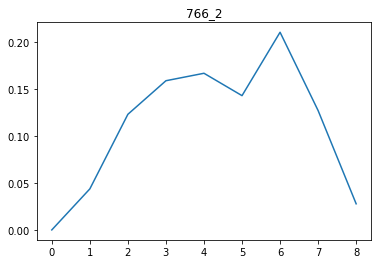

766_2 done
E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/766_5_cytosol_ratiomask_1size.tiff


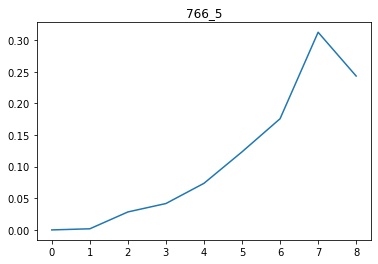

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/766_5_cytosol_ratiomask_1size.tiff


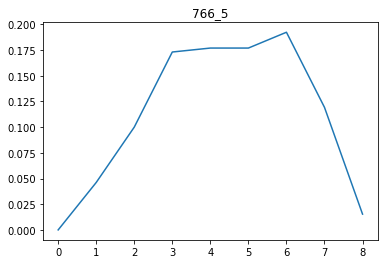

766_5 done
E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/766_7_cytosol_ratiomask_1size.tiff


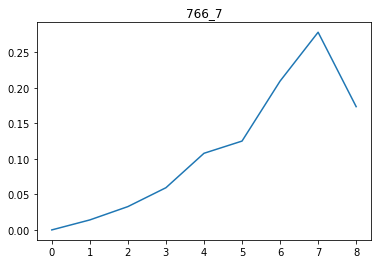

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/766_7_cytosol_ratiomask_1size.tiff


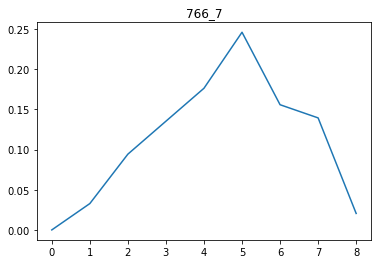

766_7 done
E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/766_8_cytosol_ratiomask_1size.tiff


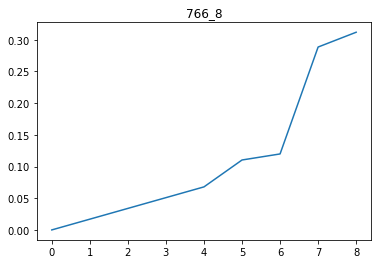

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/766_8_cytosol_ratiomask_1size.tiff


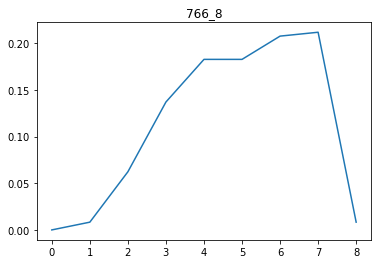

766_8 done
E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/766_10_cytosol_ratiomask_1size.tiff


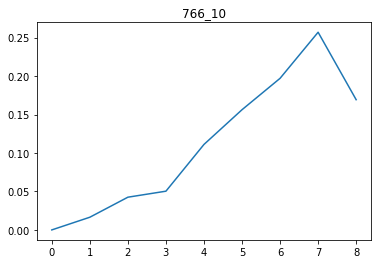

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/766_10_cytosol_ratiomask_1size.tiff


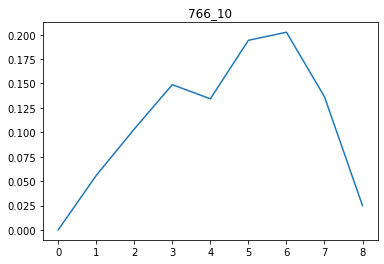

766_10 done
E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/766_11_cytosol_ratiomask_1size.tiff


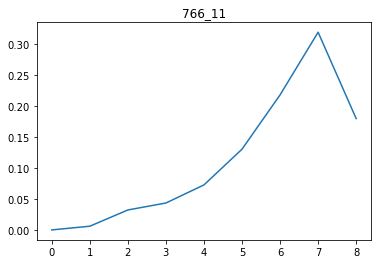

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/766_11_cytosol_ratiomask_1size.tiff


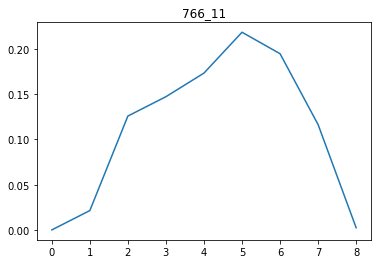

766_11 done
E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/769_5_cytosol_ratiomask_1size.tiff


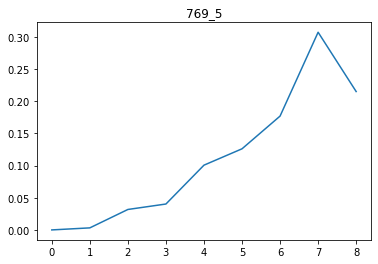

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/769_5_cytosol_ratiomask_1size.tiff


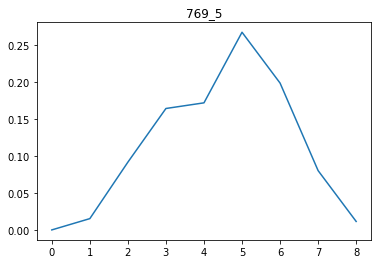

769_5 done
E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/769_7_cytosol_ratiomask_1size.tiff


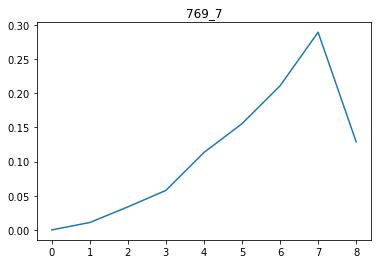

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/769_7_cytosol_ratiomask_1size.tiff


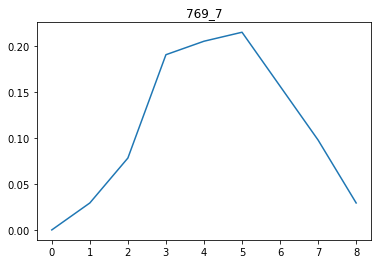

769_7 done
E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/783_5_cytosol_ratiomask_1size.tiff


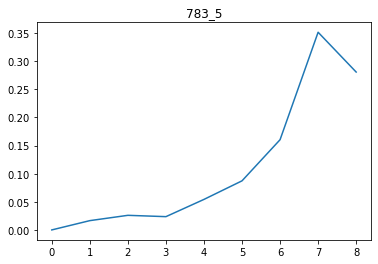

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/783_5_cytosol_ratiomask_1size.tiff


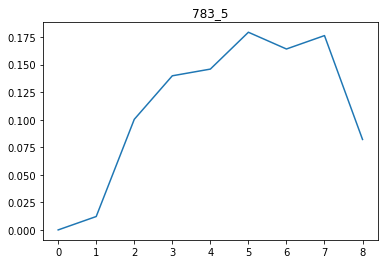

783_5 done
E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/783_11_cytosol_ratiomask_1size.tiff


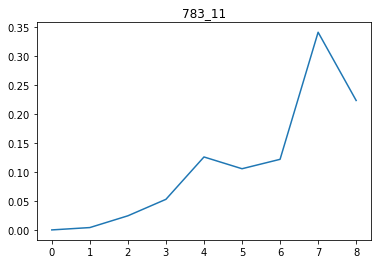

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/783_11_cytosol_ratiomask_1size.tiff


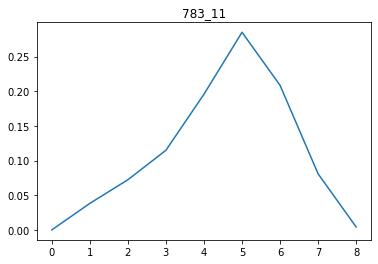

783_11 done
E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/783_12_cytosol_ratiomask_1size.tiff


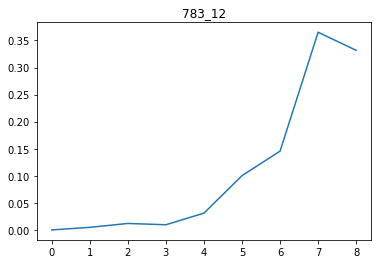

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/783_12_cytosol_ratiomask_1size.tiff


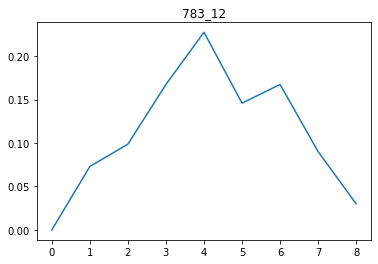

783_12 done
E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/784_4_cytosol_ratiomask_1size.tiff


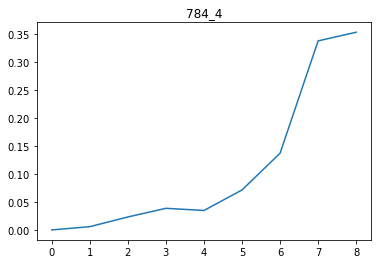

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/784_4_cytosol_ratiomask_1size.tiff


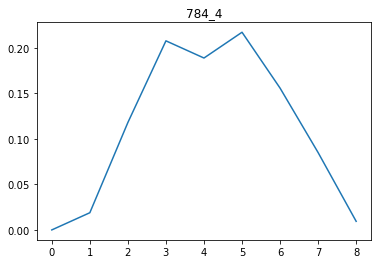

784_4 done
E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/784_5_cytosol_ratiomask_1size.tiff


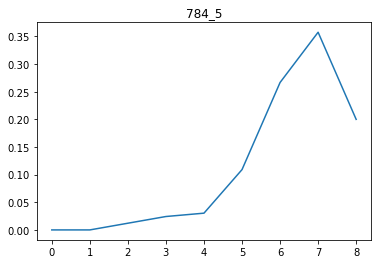

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/784_5_cytosol_ratiomask_1size.tiff


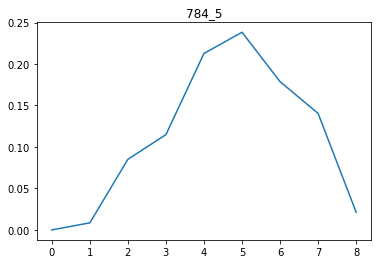

784_5 done
E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/784_6_cytosol_ratiomask_1size.tiff


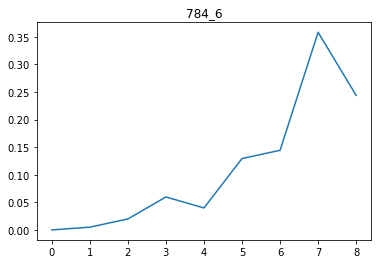

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/784_6_cytosol_ratiomask_1size.tiff


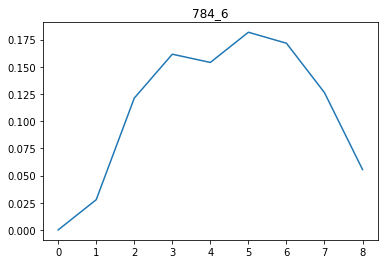

784_6 done
E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/784_7_cytosol_ratiomask_1size.tiff


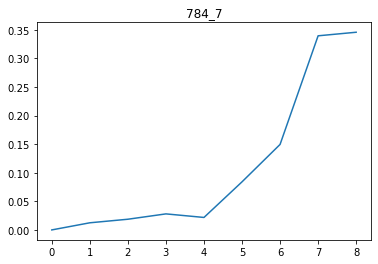

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/784_7_cytosol_ratiomask_1size.tiff


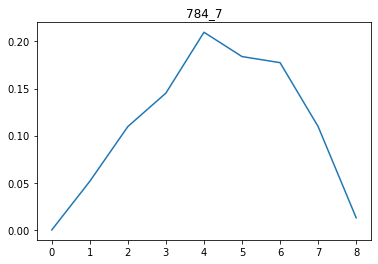

784_7 done
E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/785_7_cytosol_ratiomask_1size.tiff


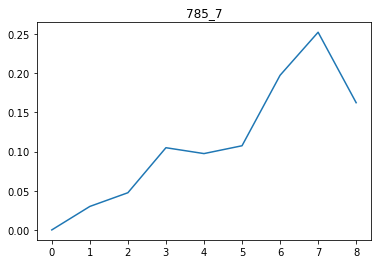

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/785_7_cytosol_ratiomask_1size.tiff


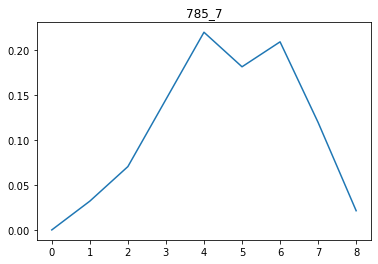

785_7 done
E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/822_4_cytosol_ratiomask_1size.tiff


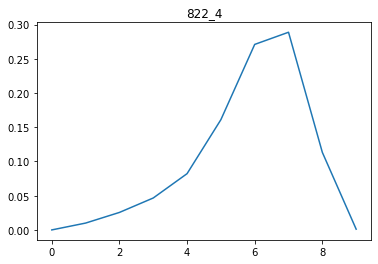

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/822_4_cytosol_ratiomask_1size.tiff


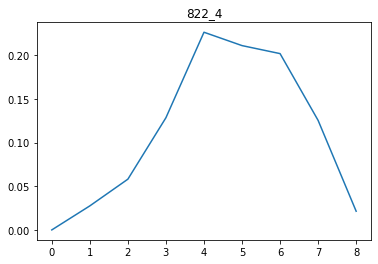

822_4 done
E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/822_6_cytosol_ratiomask_1size.tiff


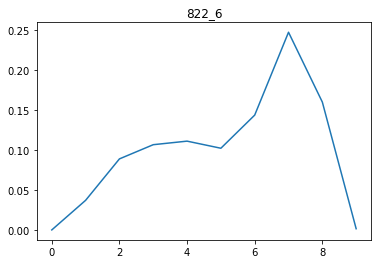

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/822_6_cytosol_ratiomask_1size.tiff


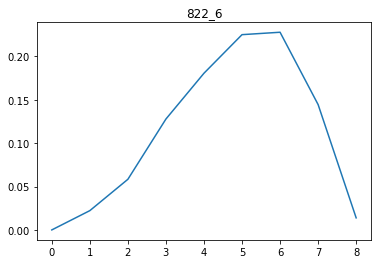

822_6 done
E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/822_7_cytosol_ratiomask_1size.tiff


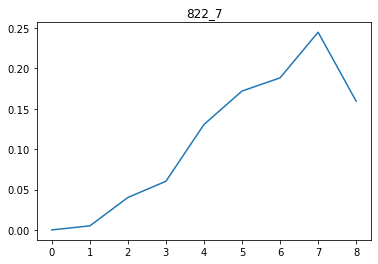

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/822_7_cytosol_ratiomask_1size.tiff


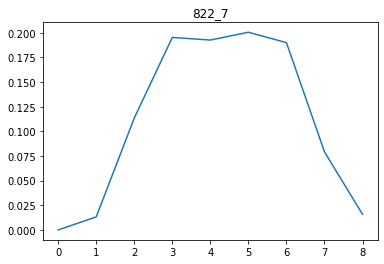

822_7 done
E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/842_12_cytosol_ratiomask_1size.tiff


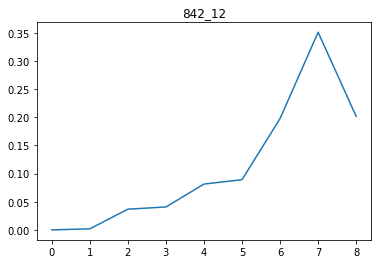

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/842_12_cytosol_ratiomask_1size.tiff


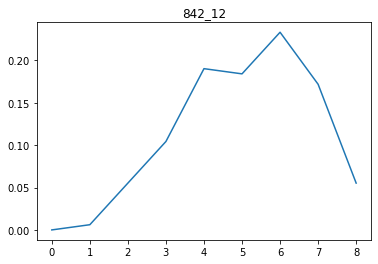

842_12 done
E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/842_13_cytosol_ratiomask_1size.tiff


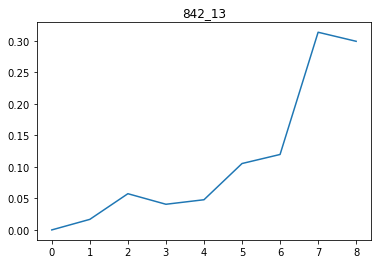

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/842_13_cytosol_ratiomask_1size.tiff


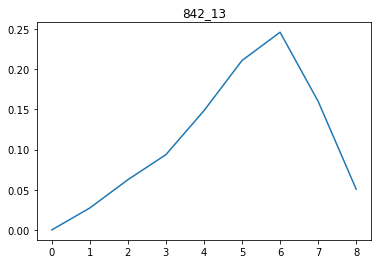

842_13 done
E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/842_17_cytosol_ratiomask_1size.tiff


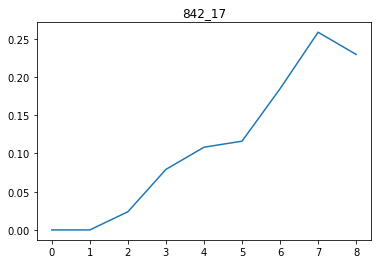

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/842_17_cytosol_ratiomask_1size.tiff


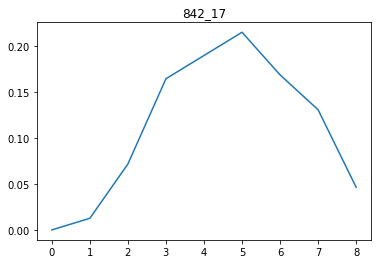

842_17 done
E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/931_9_cytosol_ratiomask_1size.tiff


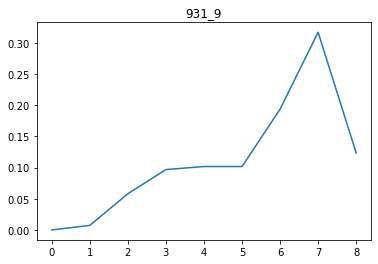

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/931_9_cytosol_ratiomask_1size.tiff


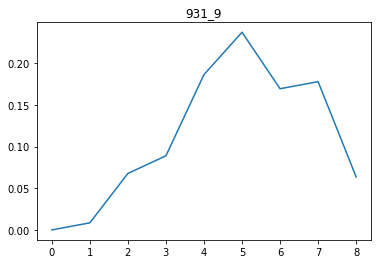

931_9 done
E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/931_14_cytosol_ratiomask_1size.tiff


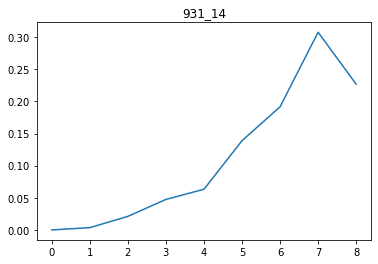

E:\PBC_data\scripts\isg-ML-sep\ratio_rdf_mask/931_14_cytosol_ratiomask_1size.tiff


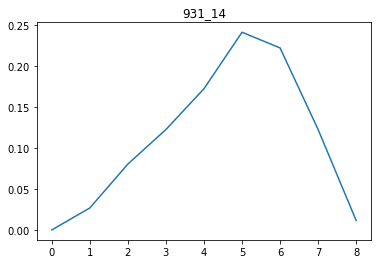

931_14 done
all done


In [9]:
import os, sys
import numpy as np
import tifffile
import mrcfile
import matplotlib.pyplot as plt



# 遍历所有文件，忽略子文件夹
def walk_dir(rootdir, suffix):
    file_list = []
    for parent, dirnames, filenames in os.walk(rootdir):
        # 只处理根目录，忽略所有子目录
        for filename in filenames:
            if filename.endswith(suffix):
                file_list.append(os.path.join(parent, filename))
        break  # 只遍历根目录，所以在第一次迭代后跳出循环
    return file_list

# for every tif file, read the image
def read_tif(file):
    img = tifffile.imread(file)
    return img



def read_mask(datasetnum, mask_type):
    # mask_type = vesicle  , mito
    datapath = f'F:\\Salilab\\Projects\\organelle-separation\\mask_output'
    idx = datasetnum


    for file in walk_dir(datapath, '.tif'):
        if mask_type in file and idx in file:
            img = read_tif(file)

    return img 




# 读取mrc
def read_mrc(datasetnum):
    mrcpath = f'E:/PBC_data/datasets/for_24_datasets' 
    for maindir, subdir, file_name_list in os.walk(mrcpath, topdown=False):
        filelist = np.array(file_name_list)
    for name in filelist:
        if datasetnum in name and  '.mrc' in name:
            mrc_name = f'{mrcpath}/{name}'
            print(mrc_name)
        else:
            pass
    mrc = mrcfile.open(mrc_name, permissive=True).data
    mrc = mrc * 27.161
    return mrc

# 读取ratio mask
def read_ratio(datasetnum):
    ratio_path = f'E:\\PBC_data\\scripts\\isg-ML-sep\\ratio_rdf_mask'
    for maindir, subdir, file_name_list in os.walk(ratio_path, topdown=False):
        filelist = np.array(file_name_list)
    # print(filelist)
    for name in filelist:
        if f'{datasetnum}_' in name:
            if name.endswith('cytosol_ratiomask_1size.tiff'):
                file_name = f'{ratio_path}/{name}'
                print(file_name)
        else:
            pass

    ratio_img = tifffile.imread(file_name)
    return ratio_img


def check_img_directions(datasetnum):

    idx = '766_2'
    isg_mask = read_mask(datasetnum, 'vesicle')
    mito_mask = read_mask(datasetnum, 'mito')
    ratio_mask = read_ratio(datasetnum)
    mrc = read_mrc(datasetnum)

    page = 242
    # 一组4张图一起显示
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    ax[0].imshow(isg_mask[page], cmap='gray')
    ax[0].set_title('isg mask')
    ax[1].imshow(mito_mask[page], cmap='gray')
    ax[1].set_title('mito mask')
    ax[2].imshow(ratio_mask[page], cmap='gray')
    ax[2].set_title('ratio mask')
    ax[3].imshow(mrc[page], cmap='gray')
    ax[3].set_title('mrc')
    plt.title(f'{datasetnum}')
    plt.show()
    plt.close()





def get_vesicle_rdf(datasetnum):
    rdflst = []
    isg_mask = read_mask(datasetnum, 'vesicle')
    # mito_mask = read_mask(datasetnum, 'mito')

    ratio_mask = read_ratio(datasetnum)
    mask = isg_mask

    #对于0以外的所有label值，每一个label值所在的点计算它在ratio_mask上对应的值,对单个label值求平均，把结果存到rdflst里
    for label in np.unique(mask):
        if label != 0:
            rdf = np.mean(ratio_mask[mask == label])
            rdflst.append(rdf)

    # 去除0值
    rdflst = [x for x in rdflst if x != 0]
    return rdflst

def get_mito_rdf(datasetnum):
    rdflst = []
    mito_mask = read_mask(datasetnum, 'mito')
    # isg_mask = read_mask(datasetnum, 'vesicle')

    ratio_mask = read_ratio(datasetnum)
    mask = mito_mask

    #对于0以外的所有label值，每一个label值所在的点计算它在ratio_mask上对应的值,对单个label值求平均，把结果存到rdflst里
    for label in np.unique(mask):
        if label != 0:
            rdf = np.mean(ratio_mask[mask == label])
            rdflst.append(rdf)

    # 去除0值
    rdflst = [x for x in rdflst if x != 0]
    return rdflst



def draw_rdf(rdflst):
    # 将0-1分成8等分，把rdflst中的值分别放到对应的区间里，统计每个区间的个数，画成连线图

    # 0-1分成8等分
    bins = np.linspace(0, 1, 9)
    # 把rdflst中的值分别放到对应的区间里
    rdf_bins = np.digitize(rdflst, bins)
    # 统计每个区间的个数
    rdf_bins_count = np.bincount(rdf_bins)
    #数值换成个百分比率
    rdf_bins_count = rdf_bins_count / np.sum(rdf_bins_count)

    # 画成连线图
    plt.plot(rdf_bins_count)
    



def main():

    datasetlsts = ['766_2','766_5','766_7','766_8','766_10','766_11','769_5','769_7','783_5','783_11', '783_12','784_4','784_5','784_6','784_7','785_7','822_4','822_6','822_7','842_12','842_13', '842_17','931_9','931_14']
    # datasetlsts = ['766_2',]
    for datasetnum in datasetlsts:
        # check_img_directions(datasetnum) # ok

        vesicle_rdf_lst = get_vesicle_rdf(datasetnum)

        #把结果以csv文件的形式存到指定文件夹
        outputpath = f'F:\\Salilab\\Projects\\IPA-toolbox\\raw_image\\rdf_results'
        outputfile = f'{outputpath}/{datasetnum}_vesicle_rdf.csv'
        np.savetxt(outputfile, vesicle_rdf_lst, delimiter=',')        



        #画图
        draw_rdf(vesicle_rdf_lst)
        plt.title(f'{datasetnum}')
        plt.show()
        plt.close()

        # print(sorted(vesicle_rdf_lst))
        # # 读取csv文件
        # rdf = np.loadtxt(outputfile, delimiter=',')


        mito_rdf_lst = get_mito_rdf(datasetnum)

        #把结果以csv文件的形式存到指定文件夹
        outputpath = f'F:\\Salilab\\Projects\\IPA-toolbox\\raw_image\\rdf_results'
        outputfile = f'{outputpath}/{datasetnum}_mito_rdf.csv'
        np.savetxt(outputfile, mito_rdf_lst, delimiter=',')

        #画图
        draw_rdf(mito_rdf_lst)
        plt.title(f'{datasetnum}')
        plt.show()
        plt.close()

        print(f'{datasetnum} done')

    print('all done')


if __name__ == '__main__':
    main()